In [2]:
import struct
import numpy as np
import scipy.ndimage
import os
import cv2

In [3]:
import matplotlib.pyplot as plt

In [6]:
plt.imread('/home/dylaneg/Documents/Programming/COS429/COS429_Final/data/outputs/images/images_rig_cam4/1477843934438567523.png').shape

(515, 908, 3)

In [110]:
image_dir = "/home/dylaneg/Documents/Programming/COS429/COS429_Final/data/data_1/images_rig_cam4"
depth_dir = "/home/dylaneg/Documents/Programming/COS429/COS429_Final/data/delivery_area_rig_depth/delivery_area/ground_truth_depth/images_rig_cam4"
inter_dir = "/home/dylaneg/Documents/Programming/COS429/COS429_Final/data/data_2/images_rig_cam4"
out_dir = "/home/dylaneg/Documents/Programming/COS429/COS429_Final/data/environment1"


In [33]:
print(sorted(os.listdir(image_dir)))

['1477843917481127523.png', '1477843917554855523.png', '1477843917628583523.png', '1477843917702311523.png', '1477843917776039523.png', '1477843917849767523.png', '1477843917923495523.png', '1477843917997223523.png', '1477843918070951523.png', '1477843918144679523.png', '1477843918218407523.png', '1477843918292135523.png', '1477843918365863523.png', '1477843918439591523.png', '1477843918513319523.png', '1477843918587047523.png', '1477843918660775523.png', '1477843918734503523.png', '1477843918808231523.png', '1477843918881959523.png', '1477843918955687523.png', '1477843919029415523.png', '1477843919103143523.png', '1477843919176871523.png', '1477843919250599523.png', '1477843919324327523.png', '1477843919398055523.png', '1477843919471783523.png', '1477843919545511523.png', '1477843919619239523.png', '1477843919692967523.png', '1477843919766695523.png', '1477843919840423523.png', '1477843919914151523.png', '1477843919987879523.png', '1477843920061607523.png', '1477843920135335523.png', 

In [34]:
print(sorted(os.listdir(depth_dir)))

['1477843917481127523.png', '1477843917554855523.png', '1477843917628583523.png', '1477843917702311523.png', '1477843917776039523.png', '1477843917849767523.png', '1477843917923495523.png', '1477843917997223523.png', '1477843918070951523.png', '1477843918144679523.png', '1477843918218407523.png', '1477843918292135523.png', '1477843918365863523.png', '1477843918439591523.png', '1477843918513319523.png', '1477843918587047523.png', '1477843918660775523.png', '1477843918734503523.png', '1477843918808231523.png', '1477843918881959523.png', '1477843918955687523.png', '1477843919029415523.png', '1477843919103143523.png', '1477843919176871523.png', '1477843919250599523.png', '1477843919324327523.png', '1477843919398055523.png', '1477843919471783523.png', '1477843919545511523.png', '1477843919619239523.png', '1477843919692967523.png', '1477843919766695523.png', '1477843919840423523.png', '1477843919914151523.png', '1477843919987879523.png', '1477843920061607523.png', '1477843920135335523.png', 

In [111]:
def create_depth_arr(depth_file, dims):
    depth_arr = []
    with open(depth_file, 'rb') as f:
        while True:
            bytes = f.read(4)
            if not bytes:
                break
            ans= struct.unpack('f', bytes)[0]
            # print(ans)
            depth_arr.append(ans)
    
    depth_arr = np.array(depth_arr)
    depth_arr = np.reshape(depth_arr, dims)
    depth_arr[depth_arr == np.inf] = np.nan

    return depth_arr

In [112]:
def create_depth_img(depth_file, dims):
    depth_arr = []
    with open(depth_file, 'rb') as f:
        while True:
            bytes = f.read(4)
            if not bytes:
                break
            ans= struct.unpack('f', bytes)[0]
            # print(ans)
            depth_arr.append(ans)
    
    depth_arr = np.array(depth_arr)
    depth_arr = np.reshape(depth_arr, dims)
    depth_arr[depth_arr == np.inf] = np.nan

    depth_img = np.zeros((depth_arr.shape[0], depth_arr.shape[1], 3))
    for i in range(3):
        depth_img[:, :, i] = depth_arr
    depth_img_norm = depth_img / np.nanmax(depth_img)

    return depth_img_norm, np.nanmax(depth_img)

In [86]:
depth_paths = (sorted(os.listdir(depth_dir)))
normalizers = []
for path in depth_paths:
    print(path)
    depth_path = depth_dir + '/' + path
    depth_img, normalizer = create_depth_img(depth_path, (480, 752))
    normalizers.append(normalizer)
    plt.imsave(image_dir + '/../images_rig_cam5/' + path, depth_img)
    


1477843917481127523.png
1477843917554855523.png
1477843917628583523.png
1477843917702311523.png
1477843917776039523.png
1477843917849767523.png
1477843917923495523.png
1477843917997223523.png
1477843918070951523.png
1477843918144679523.png
1477843918218407523.png
1477843918292135523.png
1477843918365863523.png
1477843918439591523.png
1477843918513319523.png
1477843918587047523.png
1477843918660775523.png
1477843918734503523.png
1477843918808231523.png
1477843918881959523.png
1477843918955687523.png
1477843919029415523.png
1477843919103143523.png
1477843919176871523.png
1477843919250599523.png
1477843919324327523.png
1477843919398055523.png
1477843919471783523.png
1477843919545511523.png
1477843919619239523.png
1477843919692967523.png
1477843919766695523.png
1477843919840423523.png
1477843919914151523.png
1477843919987879523.png
1477843920061607523.png
1477843920135335523.png
1477843920209063523.png
1477843920282791523.png
1477843920356519523.png
1477843920430247523.png
1477843920503975

In [65]:
print(len(normalizers))

237


In [91]:
normalizers = np.array(normalizers)
np.save(out_dir + '/normalizers.npy', normalizers)

In [87]:
input_dir = image_dir + '/..'
calibration_dir = image_dir + '/../../rig_calibration'
output_dir = out_dir + '/undistorted'

In [88]:
termstring = f'colmap image_undistorter --image_path {input_dir} --input_path {calibration_dir} --output_path {output_dir}'

In [89]:
print(termstring) # and run this string in terminal

colmap image_undistorter --image_path /home/dylaneg/Documents/Programming/COS429/COS429_Final/data/delivery_area_rig/delivery_area/images/images_rig_cam4/.. --input_path /home/dylaneg/Documents/Programming/COS429/COS429_Final/data/delivery_area_rig/delivery_area/images/images_rig_cam4/../../rig_calibration --output_path /home/dylaneg/Documents/Programming/COS429/COS429_Final/data/environment1/undistorted


In [101]:
image_undistorted_dir = out_dir + '/undistorted/images/images_rig_cam4'
depth_undistorted_dir = out_dir + '/undistorted/images/images_rig_cam5'

In [93]:
os.mkdir(out_dir + '/images')
os.mkdir(out_dir + '/depths')

In [97]:
image_paths = sorted(os.listdir(image_undistorted_dir))
for i in range(len(image_paths)):
    image_path = image_undistorted_dir + '/' + image_paths[i]
    arr = plt.imread(image_path)
    print(arr.shape)
    plt.imsave(out_dir + f'/images/image_{i}.png', arr)

(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 908, 3)
(515, 

In [109]:
depth_path = '/home/dylaneg/Documents/Programming/COS429/COS429_Final/data/environment1/undistorted/images/images_rig_cam5/1477843917481127523.png'
print(plt.imread(depth_path).shape)

(521, 917, 3)


In [103]:
depth_paths = sorted(os.listdir(depth_undistorted_dir))
norms = np.load(out_dir + '/normalizers.npy')
for i in range(len(depth_paths)):
    depth_path = depth_undistorted_dir + '/' + depth_paths[i]
    arr = (plt.imread(depth_path) * norms[i])[:, :, 0]
    arr[arr == 0] = np.nan
    print(arr.shape)
    np.save(out_dir + f'/depths/depth_{i}.npy', arr)

(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)
(521, 917)

KeyboardInterrupt: 

In [37]:
depth_arr = create_depth_arr(depth_dir + '/' + depth_paths[0], (480, 752))

In [43]:
depth_img = np.zeros((depth_arr.shape[0], depth_arr.shape[1], 3))
for i in range(3):
    depth_img[:, :, i] = depth_arr

In [44]:
plt.imsave("test.png", depth_img)

In [45]:
depth_img_norm = depth_img / np.nanmax(depth_img)

In [46]:
plt.imsave("test.png", depth_img_norm)

In [48]:
read_arr = plt.imread("test.png")

In [52]:
print(depth_img_norm)

[[[0.19417856 0.19417856 0.19417856]
  [0.1968808  0.1968808  0.1968808 ]
  [0.19773069 0.19773069 0.19773069]
  ...
  [0.23642021 0.23642021 0.23642021]
  [0.23544311 0.23544311 0.23544311]
  [0.23493264 0.23493264 0.23493264]]

 [[0.19739373 0.19739373 0.19739373]
  [0.19875253 0.19875253 0.19875253]
  [0.20001553 0.20001553 0.20001553]
  ...
  [0.23845827 0.23845827 0.23845827]
  [0.23804793 0.23804793 0.23804793]
  [0.23818015 0.23818015 0.23818015]]

 [[0.19890242 0.19890242 0.19890242]
  [0.20028821 0.20028821 0.20028821]
  [0.20178576 0.20178576 0.20178576]
  ...
  [0.24028881 0.24028881 0.24028881]
  [0.24016781 0.24016781 0.24016781]
  [0.23953737 0.23953737 0.23953737]]

 ...

 [[0.06386383 0.06386383 0.06386383]
  [0.06451729 0.06451729 0.06451729]
  [0.06465432 0.06465432 0.06465432]
  ...
  [       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]]

 [[0.06364393 0.06364393 0.06364393]
  [0.06403094 0.06403094 0.06403094]


In [54]:
print(depth_img)

[[[5.26929188 5.26929188 5.26929188]
  [5.34262085 5.34262085 5.34262085]
  [5.36568356 5.36568356 5.36568356]
  ...
  [6.41557503 6.41557503 6.41557503]
  [6.38906002 6.38906002 6.38906002]
  [6.3752079  6.3752079  6.3752079 ]]

 [[5.35653973 5.35653973 5.35653973]
  [5.39341259 5.39341259 5.39341259]
  [5.42768574 5.42768574 5.42768574]
  ...
  [6.47088051 6.47088051 6.47088051]
  [6.45974541 6.45974541 6.45974541]
  [6.46333313 6.46333313 6.46333313]]

 [[5.39748001 5.39748001 5.39748001]
  [5.4350853  5.4350853  5.4350853 ]
  [5.47572327 5.47572327 5.47572327]
  ...
  [6.52055454 6.52055454 6.52055454]
  [6.51727104 6.51727104 6.51727104]
  [6.50016308 6.50016308 6.50016308]]

 ...

 [[1.73302937 1.73302937 1.73302937]
  [1.75076199 1.75076199 1.75076199]
  [1.75448036 1.75448036 1.75448036]
  ...
  [       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]]

 [[1.72706223 1.72706223 1.72706223]
  [1.73756409 1.73756409 1.73756409]


In [53]:
print(read_arr[:, :, :3] * np.nanmax(depth_img))

[[[5.214431  5.214431  5.214431 ]
  [5.3208475 5.3208475 5.3208475]
  [5.3208475 5.3208475 5.3208475]
  ...
  [6.385017  6.385017  6.385017 ]
  [6.385017  6.385017  6.385017 ]
  [6.2786    6.2786    6.2786   ]]

 [[5.3208475 5.3208475 5.3208475]
  [5.3208475 5.3208475 5.3208475]
  [5.4272647 5.4272647 5.4272647]
  ...
  [6.385017  6.385017  6.385017 ]
  [6.385017  6.385017  6.385017 ]
  [6.385017  6.385017  6.385017 ]]

 [[5.3208475 5.3208475 5.3208475]
  [5.4272647 5.4272647 5.4272647]
  [5.4272647 5.4272647 5.4272647]
  ...
  [6.491434  6.491434  6.491434 ]
  [6.491434  6.491434  6.491434 ]
  [6.491434  6.491434  6.491434 ]]

 ...

 [[1.7026713 1.7026713 1.7026713]
  [1.7026713 1.7026713 1.7026713]
  [1.7026713 1.7026713 1.7026713]
  ...
  [0.        0.        0.       ]
  [0.        0.        0.       ]
  [0.        0.        0.       ]]

 [[1.7026713 1.7026713 1.7026713]
  [1.7026713 1.7026713 1.7026713]
  [1.7026713 1.7026713 1.7026713]
  ...
  [0.        0.        0.       ]
  [0

In [47]:
print(depth_img_norm)

[[[0.19417856 0.19417856 0.19417856]
  [0.1968808  0.1968808  0.1968808 ]
  [0.19773069 0.19773069 0.19773069]
  ...
  [0.23642021 0.23642021 0.23642021]
  [0.23544311 0.23544311 0.23544311]
  [0.23493264 0.23493264 0.23493264]]

 [[0.19739373 0.19739373 0.19739373]
  [0.19875253 0.19875253 0.19875253]
  [0.20001553 0.20001553 0.20001553]
  ...
  [0.23845827 0.23845827 0.23845827]
  [0.23804793 0.23804793 0.23804793]
  [0.23818015 0.23818015 0.23818015]]

 [[0.19890242 0.19890242 0.19890242]
  [0.20028821 0.20028821 0.20028821]
  [0.20178576 0.20178576 0.20178576]
  ...
  [0.24028881 0.24028881 0.24028881]
  [0.24016781 0.24016781 0.24016781]
  [0.23953737 0.23953737 0.23953737]]

 ...

 [[0.06386383 0.06386383 0.06386383]
  [0.06451729 0.06451729 0.06451729]
  [0.06465432 0.06465432 0.06465432]
  ...
  [       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]]

 [[0.06364393 0.06364393 0.06364393]
  [0.06403094 0.06403094 0.06403094]


In [ ]:
depth_dirs = sorted(os.listdir(depth_dir))
for i in range(len(depth_dir)):
    path = depth_dirs[i]
    depth_path = depth_dir + '/' + path

    out_depth_path = out_dir + f'/depths/depth_{i}'

    image_arr = plt.imread(image_path)
    dims = (image_arr.shape[0], image_arr.shape[1])
    plt.imsave(out_image_path, image_arr)

    depth_arr = create_depth_arr(depth_path, (480, 752))
    np.save(out_depth_path, depth_arr)
    


In [14]:
image_dirs = sorted(os.listdir(image_dir))
for i in range(len(image_dir)):
    path = image_dirs[i]
    image_path = image_dir + '/' + path
    depth_path = depth_dir + '/' + path

    out_image_path = out_dir + f'/images/image_{i}.png'
    out_depth_path = out_dir + f'/depths/depth_{i}'

    image_arr = plt.imread(image_path)
    dims = (image_arr.shape[0], image_arr.shape[1])
    plt.imsave(out_image_path, image_arr)

    depth_arr = create_depth_arr(depth_path, (480, 752))
    np.save(out_depth_path, depth_arr)
    


In [20]:
arr = plt.imread('/home/dylaneg/Documents/Programming/COS429/COS429_Final/data/environment1/images/image_12.png')

In [13]:
depth_arr = []
with open(depth_path, 'rb') as f:
    while True:
        bytes = f.read(4)
        if not bytes:
            break
        ans= struct.unpack('f', bytes)[0]
        # print(ans)
        depth_arr.append(ans)

depth_arr = np.array(depth_arr)

In [7]:
depths_path = "/home/dylaneg/Documents/Programming/COS429/COS429_Final/data/environment1/depths"

In [9]:
urls = sorted(os.listdir(depths_path))
print(urls)

['depth_0.npy', 'depth_1.npy', 'depth_10.npy', 'depth_100.npy', 'depth_101.npy', 'depth_102.npy', 'depth_103.npy', 'depth_104.npy', 'depth_105.npy', 'depth_106.npy', 'depth_107.npy', 'depth_108.npy', 'depth_109.npy', 'depth_11.npy', 'depth_110.npy', 'depth_111.npy', 'depth_112.npy', 'depth_113.npy', 'depth_114.npy', 'depth_12.npy', 'depth_13.npy', 'depth_14.npy', 'depth_15.npy', 'depth_16.npy', 'depth_17.npy', 'depth_18.npy', 'depth_19.npy', 'depth_2.npy', 'depth_20.npy', 'depth_21.npy', 'depth_22.npy', 'depth_23.npy', 'depth_24.npy', 'depth_25.npy', 'depth_26.npy', 'depth_27.npy', 'depth_28.npy', 'depth_29.npy', 'depth_3.npy', 'depth_30.npy', 'depth_31.npy', 'depth_32.npy', 'depth_33.npy', 'depth_34.npy', 'depth_35.npy', 'depth_36.npy', 'depth_37.npy', 'depth_38.npy', 'depth_39.npy', 'depth_4.npy', 'depth_40.npy', 'depth_41.npy', 'depth_42.npy', 'depth_43.npy', 'depth_44.npy', 'depth_45.npy', 'depth_46.npy', 'depth_47.npy', 'depth_48.npy', 'depth_49.npy', 'depth_5.npy', 'depth_50.npy'

In [14]:
print(depth_arr.shape)

(360960,)


In [17]:
depth_arr = np.reshape(depth_arr, (480, 752))

In [19]:
depth_arr[depth_arr == np.inf] = np.nan

In [20]:
print(depth_arr)

[[4.45824909 4.48465252 4.49986744 ...        nan        nan        nan]
 [4.54807568 4.56685448 4.58391857 ...        nan        nan        nan]
 [4.5411005         nan        nan ...        nan        nan        nan]
 ...
 [2.01916122 2.02951145 2.04197788 ...        nan        nan        nan]
 [2.01164818 2.02161884 2.02572346 ...        nan        nan        nan]
 [1.99581432 2.01403427 2.0182991  ...        nan        nan        nan]]


In [22]:
depth_img = np.zeros((depth_arr.shape[0], depth_arr.shape[1], 3))
for i in range(3):
    depth_img[:, :, i] = depth_arr

In [26]:
depth_img_zeros = depth_img.copy()

In [39]:
depth_img_zeros[np.isnan(depth_img)] = 0

In [ ]:
print(depth_img / np.ma)

In [38]:
print(np.sum(np.isnan(depth_img)))

265341


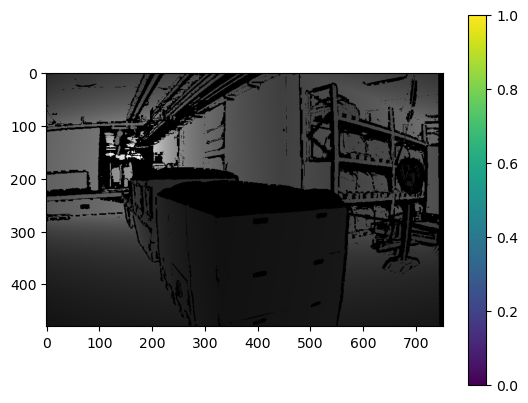

In [40]:
plt.imshow(depth_img_zeros / np.nanmax(depth_img))
plt.colorbar()

In [16]:
plt.imread('/home/dylaneg/Documents/Programming/COS429/COS429_Final/data/environment1/images/image_2.png').shape

(480, 752, 4)

In [42]:
depth_img /= np.nanmax(depth_img)

In [65]:
mtx = np.array([[711.926, 0, 410.892], [0, 710.904, 250.748], [0, 0, 1]]).astype('float32')

In [63]:
D = np.array([0.579, -0.484, -0.433, 1.538]).astype('float32')

In [66]:
Knew = np.array([[538.731, 0, 503.622], [0, 538.615, 265.447], [0, 0, 1]]).astype('float32')

In [72]:
dims = (917, 521)

In [67]:
print(depth_img.shape)

(480, 752, 3)


In [ ]:
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [73]:
out = cv2.fisheye.undistortImage(depth_img, K=mtx, D=D, Knew=Knew, new_size=dims)

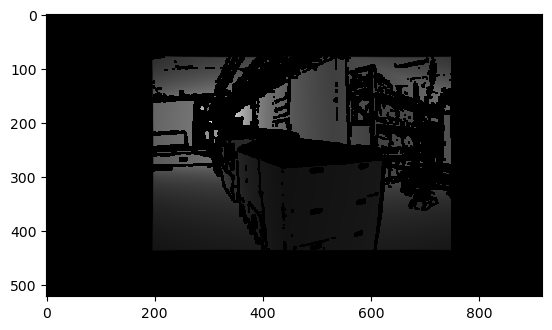

In [74]:
plt.imshow(out)

In [71]:
print(out.shape)

(917, 521, 3)


In [77]:
!pip install pycolmap

/bin/bash: /home/dylaneg/miniconda3/envs/cos429/lib/python3.8/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [1]:
import pycolmap

In [4]:
import pathlib

In [5]:
print(pathlib.Path)

<class 'pathlib.Path'>


In [ ]:
pycolmap.undistort_images('data/environment1/images', 'data/environment1/images', 'data/environment1/images')

: 